##  2- Análisis gráfico global  y algunas estadísticas

Se mostrarán las funciones que dispone NILMTK para realizar un diagnóstico rápido del dataset. Así también se disponen de algunas funciones para obtener datos estadísticos basados en el uso y consumo de energía de los elementos.

Como siempre, en primer lugar cargamos librerías y relizamos otros ajustes:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from nilmtk import DataSet, TimeFrame
import warnings
from IPython.display import SVG

warnings. filterwarnings("ignore")
plt.style.use('bmh')



Cargamos ahora el dataset y asociamos las etiquetas para los gráficos

In [2]:
#dataset de referencia 
deps = DataSet('dsual.h5')



elec=deps.buildings[1].elec # Todos los medidores

print (elec)
labels = pd.DataFrame({'Instances': list(range(1,8)),
                       'Meters': ['Main', 'Boiler', 'Fan', 'Freezer', 'Television','Vacuum cleaner', 'light']})
Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x] 
    
print(Meters)


#etiquetas eje x en algunos graficos
days = ['2021-11-10 18:08:00+01:00',  '2021-11-12 10:31:00+01:00' ]

colors_1 = ['tab:red','tab:brown','tab:gray','tab:pink','tab:blue','tab:orange','tab:green']
colors_2 = [colors_1[0]]+colors_1[4:]

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='boiler', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=7, building=1, dataset='DSUAL', appliances=[Appliance(type='light', instance=1)])
)
{ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[]): 'Main', ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='boiler', instance=1)]): 'Boiler', ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Ap

Ahora vamos a realizar los graficos con  todos los datos de potencia

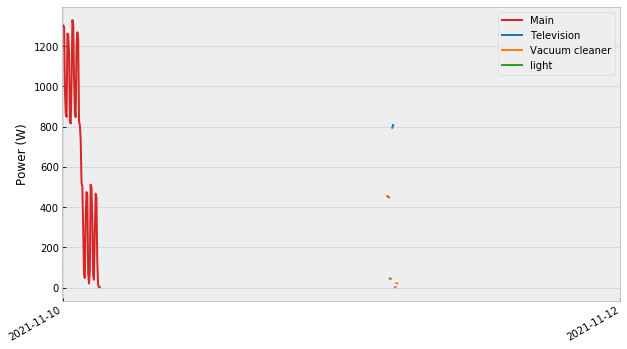

In [3]:
rcParams['figure.figsize'] = (10, 6)

tf1=TimeFrame(start='2021-11-10', end='2021-11-12')
ax=elec.select(instance=[1,2,3,4,5,6,7]).plot(timeframe=tf1)
#colores
c=0
for col in colors_2:    
    ax.get_lines()[c].set_color(col)
    c+=1    
#etiquetas
ax.legend([list(Meters.values())[0]]+list(Meters.values())[4:10])
ax.set(xticks=days[:5])
#guarda gráfico
plt.savefig('./data/images/paso2/2.5_Plot_all_meters_week1.svg', bbox_inches='tight', transparent=True)
plt.show()
pass

Relación entre la señal agregada y la suma de las mediciones individuales de los dispositivos mediante una gráfica de área:

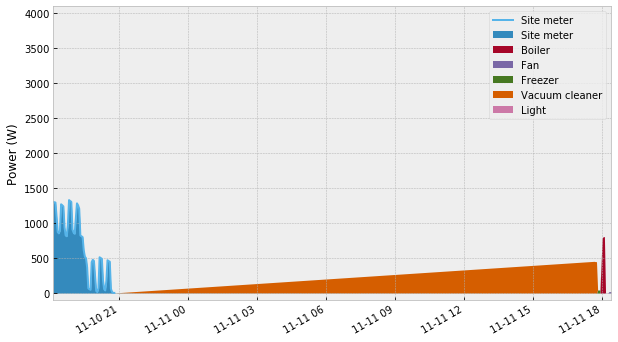

In [4]:

from nilmtk import TimeFrame
t=TimeFrame(start='2021-11-10 18:08:00+01:00', end='2021-11-12 09:31:00+01:00')
elec.select(instance=[1,2,3,4,5,6,7]).plot(kind='area',timeframe=t)
ax=elec[1].plot(timeframe=t)

ax.set(ylim=(-100,4100))
pass


In [5]:
colors_2[:6]

['tab:red', 'tab:blue', 'tab:orange', 'tab:green']

Un gráfico similar de la relación entre la señal agregada y la suma de las mediciones individuales de los dispositivos mediante una gráfica de área::

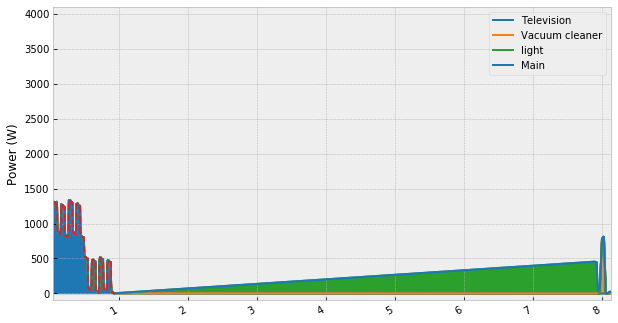

In [6]:
rcParams['figure.figsize'] = (10, 6)

t0 = '2021-11-10 18:08:00+01:00'
t1 = '2021-11-12 09:31:00+01:00'
df_1 = elec.select(instance=[1,2,3,4,5,6,7]).dataframe_of_meters(ac_type='active', sample_period=60)[t0:t1]
df_2 = elec[1].power_series_all_data(ac_type='active', sample_period=60)[t0:t1]

ax1 = df_1.plot(kind='area', color=colors_2[1:])
df_2.plot(ax=ax1, color=colors_1[0], ls='--')

 
#etiquetas
ax1.legend(list(Meters.values())[4:10]+[list(Meters.values())[0]])
ax1.set_xticklabels(['1','2','3','4','5','6','7','8'])
ax1.set(ylim=(-100,4100))
ax1.set(ylabel='Power (W)')
#guarda gráfico
plt.savefig('./data/images/paso2/2.7_Plot_all_meters_03march.svg', bbox_inches='tight', transparent=True)
plt.show()
pass

In [7]:
elec.select(instance=[1,2,3,4,5,6,7]).power_series_all_data(ac_type='active', sample_period=60)[t0:t1]

Loading data for meter ElecMeterID(instance=7, building=1, dataset='DSUAL')     
Done loading data all meters for this chunk.


2021-11-10 18:08:00+01:00    1255.106079
2021-11-10 18:09:00+01:00    1311.344604
2021-11-10 18:10:00+01:00    1307.418091
2021-11-10 18:11:00+01:00    1304.363037
2021-11-10 18:12:00+01:00    1303.462646
                                ...     
2021-11-12 09:27:00+01:00            NaN
2021-11-12 09:28:00+01:00            NaN
2021-11-12 09:29:00+01:00            NaN
2021-11-12 09:30:00+01:00            NaN
2021-11-12 09:31:00+01:00            NaN
Freq: 60S, Name: (power, active), Length: 2364, dtype: float32

### Perfil de Voltaje

In [8]:
V1=next(elec[1].load())['voltage']
d = {'Indicador': ['Promedio', 'Máximo', 'Mínimo'],
     'V1':    [round(V1.mean(),1),round(V1.max(),1),round(V1.min(),1)]} #Voltaje R S T mean
     
pd.DataFrame(d)



,Indicador,V1
0,Promedio,239.399994
1,Máximo,240.899994
2,Mínimo,236.199997


In [9]:
V2=next(elec[2].load())['voltage']
V3=next(elec[3].load())['voltage']
V4=next(elec[4].load())['voltage']
V5=next(elec[5].load())['voltage']
V6=next(elec[6].load())['voltage']
V7=next(elec[7].load())['voltage']



In [10]:
d = {'Indicador': ['Promedio', 'Máximo', 'Mínimo'],
     'Boiler':    [round(V2.mean(),1), round(V2.mean(),1), round(V2.mean(),1)], #Voltaje boiler
     'Fan':    [round(V3.max(),1),  round(V3.max(),1),  round(V3.max(),1)],  #Voltaje fan
     'Freezer':    [round(V4.min(),1),  round(V4.min(),1),  round(V4.min(),1)],  #Voltaje freezer
     'Television':    [round(V5.min(),1),  round(V5.min(),1),  round(V5.min(),1)],  #Voltaje tv
     'Vacuum cleaner':    [round(V6.min(),1),  round(V6.min(),1),  round(V6.min(),1)],  #Voltaje freezer
     'Light':    [round(V7.min(),1),  round(V7.min(),1),  round(V7.min(),1)]}  #Voltaje freezer



pd.DataFrame(d)

,Indicador,Boiler,Fan,Freezer,Television,Vacuum cleaner,Light
0,Promedio,238.600006,240.5,237.100006,238.0,237.199997,236.800003
1,Máximo,238.600006,240.5,237.100006,238.0,237.199997,236.800003
2,Mínimo,238.600006,240.5,237.100006,238.0,237.199997,236.800003


## Gráfico del perfil de voltaje

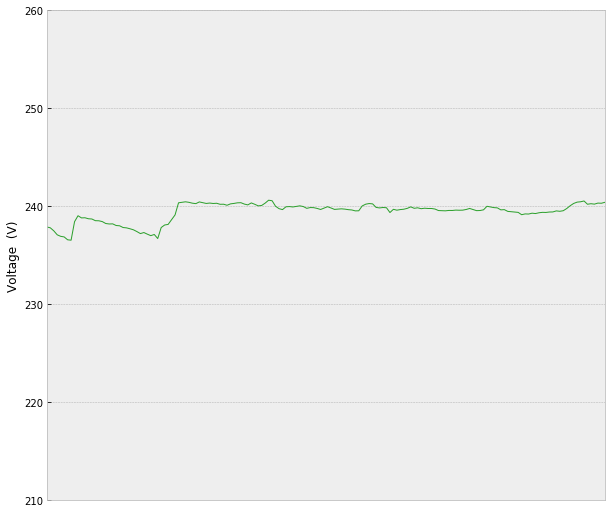

In [11]:
rcParams['figure.figsize'] = (10, 10)

#redimensina el gráfico para reducir tamaño
V1=next(elec[1].load(sample_period=60))['voltage']

fig, (ax1) = plt.subplots(1, 1, gridspec_kw={'hspace': 0.4})

ta = '2021-11-10 18:08:00+01:00' #18:00
tb = '2021-11-10 20:49:00+01:00'  #18:31

V1[ta:tb].plot(ax=ax1, c='tab:green', lw=1)

ax1.set(ylim=(210,260))

ax1.set(ylabel='Voltage  (V)')


ax1.set(xticks=days[1:])


#guarda gráfico
plt.savefig('./data/images/paso2/2.8_voltage_profile.svg', bbox_inches='tight', transparent=True)
plt.show()
pass

### Datos faltantes

Los datos faltantes, huecos o gaps están determinados por los metadatos de cada tipo de medidor, específicamente en el ajuste del parámetro max_sample_period. Este valor indica el tiempo máximo que se tolera entre mediciones sin que se considere que el medidor está apagado

In [12]:
elec[1].good_sections(full_results=True).combined() #secciones buenas Main_RST

[TimeFrame(start='2021-11-10 18:08:48+01:00', end='2021-11-10 20:49:17+01:00', empty=False)]

Visualizar de manera gráfica los datos faltantes 

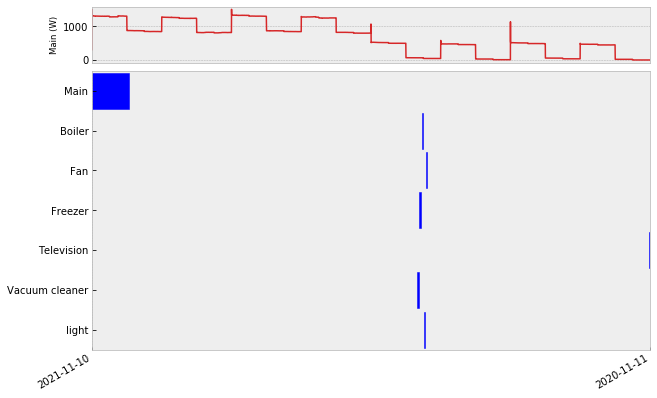

In [13]:
rcParams['figure.figsize'] = (10, 7)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'hspace': 0.05,'height_ratios':[1,5]})

elec[1].power_series_all_data().plot(ax=ax1, c='tab:red', lw=1.5)
ax1.set_ylabel('Main (W)', fontsize=8.5)
ax1.minorticks_off()

elec.plot_good_sections(ax=ax2)
ax2.set_yticklabels(reversed(list(Meters.values())))
ax2.grid(axis='y')
ax2.set(xticks=days)
l=['2021-11-10','2020-11-11','2020-11-12']
ax2.set_xticklabels(l, rotation=30, ha='right')

#guarda gráfico
plt.savefig('./data/images/paso2/2.9_good_sections.svg', bbox_inches='tight', transparent=True)
plt.show()
pass

### Tasa de abandono y tiempo de funcionamiento

#### Tasa de abandono
Sin contar cuando el sistema no registra datos superando el tiempo máximo de muestreo, aunque también se perciben perdidas de datos debido al propio sistema de adquisición, lo cual se le llama abandono o dropout. 

La tasa de abandono (dropout rate) es por tanto  un número entre 0 y 1 que especifica la proporción de muestras faltantes. Una tasa de abandono de 0 significa que no faltan muestras y un valor de 1 significaría que faltan todas las muestras (100%). 

#### Tiempo de funcionamiento
El tiempo de funcionamiento calculado estará condicionado al parámetro max_sample_period de cada medidor especificado en los metadatos. Si no se han registrado datos pasado  ese tiempo, se considera el medidor como apagado.

In [14]:
a=[]; b=[]; c=[]
for meter, name in Meters.items():
    a.append(name)
    b.append(str(meter.uptime())) #tiempo de funcionamiento
    c.append(round(meter.dropout_rate()*100,1)) #tasa de abandono

a.append('Total')
b.append(str(elec.uptime()))
c.append(round(elec.dropout_rate()*100,1))
    
df=pd.DataFrame(data=[b,c], columns=a, index=['Uptime','Dropout Rate']).transpose()
df

Calculating dropout_rate for ElecMeterID(instance=7, building=1, dataset='DSUAL') ...   

,Uptime,Dropout Rate
Main,0 days 02:40:29,0
Boiler,0 days 00:05:07,0
Fan,0 days 00:05:07,0
Freezer,0 days 00:05:07,0
Television,0 days 00:05:07,0
Vacuum cleaner,0 days 00:05:07,0
light,0 days 00:05:07,0
Total,0 days 02:40:29,0


### Registro de actividad

Periodos de tiempo en que se registra una medición superior a un umbral definido (incluyendo peaks).

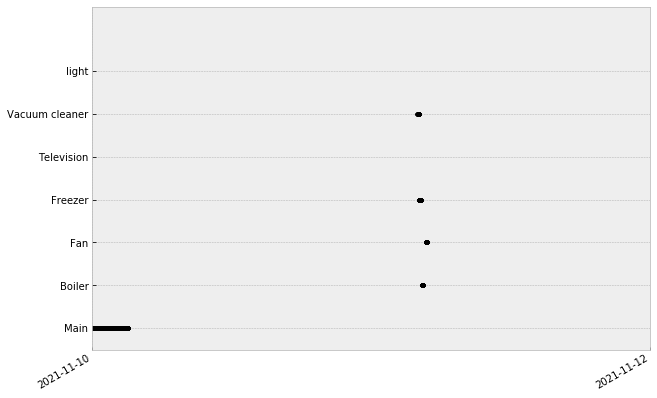

In [15]:
rcParams['figure.figsize'] = (10, 7)

Devices=elec.select(instance=[1,2,3,4,5,6,7]) #MeterGroup de dispositivos
ax=Devices.plot_when_on(on_power_threshold=10) #umbral de 80 W

#etiquetas
ax.set_yticklabels(list(Meters.values())[0:7])
ax.set(xticks=days)

#guarda gráfico
plt.savefig('./data/images/paso2/2.10_On_power1.pdf', bbox_inches='tight', transparent=True)
plt.savefig('./data/images/paso2/2.10_On_power1.png', bbox_inches='tight', transparent=True, dpi=1200)
#formatos savefig: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz, evitar guardar .svg por el tamaño del archivo (50Mb)
plt.show()
pass


### Graficos de Actividad por dispositivo y por día

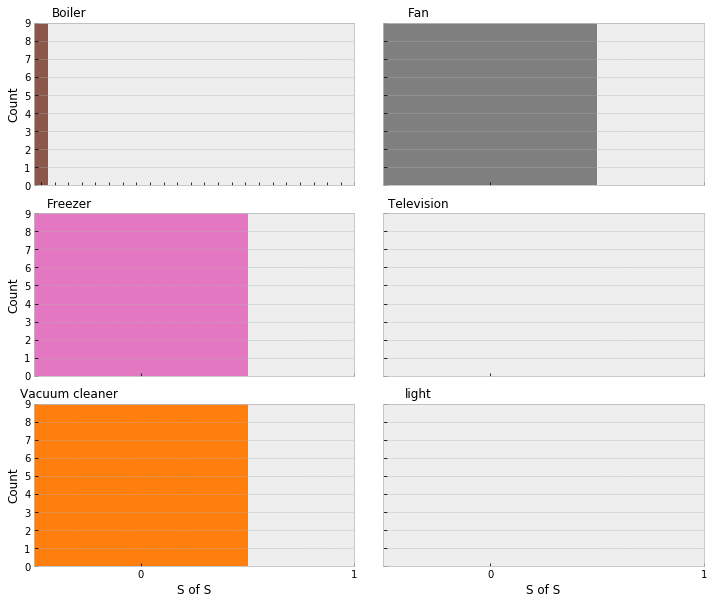

In [16]:
rcParams['figure.figsize'] = (12, 10)
fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2, sharex=True, sharey=True,
                                                       gridspec_kw={'hspace': 0.17, 'wspace': 0.09})
m=1
for ax in fig.get_axes(): 
    list(Meters)[m].plot_activity_histogram(ax=ax, period='S', #periodo en segundos
                                            bin_duration='S', #duración en segundos
                                            on_power_threshold=10, #umbral de 10w
                                            plot_kwargs={'color':colors_1[m]})
    #labels
    ttl=ax.set_title(labels['Meters'][m], fontsize=12)
    ttl.set_position([.11, 1])
    m=m+1
    ax.grid(axis='x')

ax1.set(ylim=[0,9])
ax1.set(yticks=[0,1,2,3,4,5,6,7,8,9])
ax1.set(xticks=list(range(0,24)))
#labels
ax1.set(xlabel='')
ax2.set(xlabel='',ylabel='')
ax3.set(xlabel='')
ax4.set(xlabel='',ylabel='')
ax6.set(ylabel='')

#guarda gráfico
plt.savefig('./data/images/paso2/2.12_Activity_histogram.svg',bbox_inches='tight', transparent=True)
plt.show()
pass

### Mapa de calor con las mediciones de potencia activa del medidor Main 

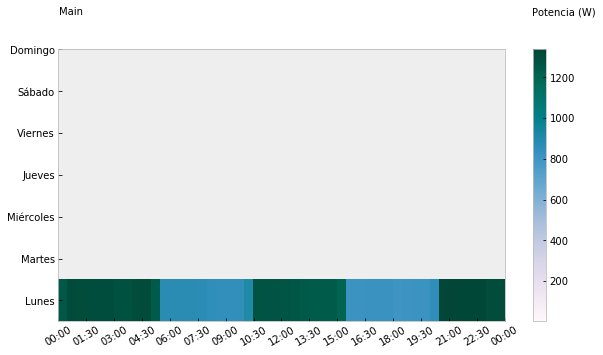

In [27]:
import numpy as np
import pandas as pd

d=elec[1].power_series_all_data(sample_period=60, resample_kwargs={'how': 'mean'}).to_frame()

d.fillna(0,inplace=True)
d.columns=['active']
d['weekday']=d.index.weekday
d['time']=d.index.time
matrix=d.groupby(['weekday','time']).active.mean().unstack().values
plt.figure(figsize=(10, 5))
ax = plt.gca()
plt.pcolor(matrix,cmap='PuBuGn')
plt.xlim([0,48])
ax.set_xticks(np.arange(0,49,3))
ax.set_xticklabels(['00:00','01:30','03:00','04:30','06:00',
                    '07:30','09:00','10:30','12:00','13:30',
                    '15:00','16:30','18:00','19:30','21:00',
                    '22:30','00:00'],rotation=30)
ax.set_yticks(np.arange(0.5,7))
ax.set_yticklabels(['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo'])
plt.colorbar()
ax.text(0.1, 7.4, 'Main', ha='left', va='center')
ax.text(51, 7.4, 'Potencia (W)', ha='left', va='center') 

plt.savefig('./data/images/paso2/2.13_Use_power1.svg', bbox_inches='tight', transparent=True)
plt.show()

### Estadísticas de energía

Cálculo de la energía total, es decir , las potencias activa, reactiva y aparente.

In [18]:
elec[1].total_energy()

apparent    3.423200
active      1.769540
reactive    0.000185
dtype: float64

Cálculo de la energía (potencia activa) por medidores

In [19]:
#energía por submedidor kwH diaria promedio
d1=elec.energy_per_meter(ac_type=['active'], per_period='D').round(2) # kWh, per_period='D'
#energía por submedidor kwH semanal promedio
d2=elec.energy_per_meter(ac_type=['active'], per_period='W').round(2) # kWh, per_period='W'
#energía por submedidor kwH total
d3=elec.energy_per_meter(ac_type=['active'], per_period='M').round(2) # kWh, per_period='D'

df=d1.append([d2,d3]).drop(index=['apparent', 'reactive']).transpose()
df.index = [list(labels['Meters'])]
df.columns = ['kWh Día','kWh Sem.','kwh Mens']
df

7/7 ElecMeter(instance=7, building=1, dataset='DSUAL', appliances=[Appliance(type='light', instance=1)])ance=1)])

,kWh Día,kWh Sem.,kwh Mens
Main,15.88,111.15,492.21
Boiler,19.21,134.48,595.56
Fan,0.53,3.70,16.37
Freezer,1.08,7.57,33.53
Television,0.07,0.52,2.31
Vacuum cleaner,10.82,75.73,335.39
light,0.07,0.49,2.15


### Proporción de energía submedida respecto a la medición agregada.

Se usa la función original proportion_of_energy_submetered que se ha modificado para representar correctamente las etiquetas, dando paso a proportion_of_energy_submetered_2 en donde se pueden especificar por separado el medidor principal y los submedidores. Esta funcion se integra en metergroup.py que almacenamos en users\USUARIO\anaconda3\envs\nilmtk-env\Lib\site-packages\nilmtk\metergroup.py

In [20]:
Devices=elec.select(instance=[2,3,4,5,6,7]) #MeterGroup de dispositivos
elec.proportion_of_energy_submetered_2(elec[1], Devices, ac_type='active')

Running MeterGroup.proportion_of_energy_submetered...


0.0

In [21]:
Devices=elec.select(instance=[2,3,4,5,6,7]) #MeterGroup de dispositivos
elec.proportion_of_energy_submetered_2(elec[1], Devices, ac_type='reactive')

Running MeterGroup.proportion_of_energy_submetered...


0.0

In [22]:
Devices=elec.select(instance=[2,3,4,5,6,7]) #MeterGroup de dispositivos
elec.proportion_of_energy_submetered_2(elec[1], Devices, ac_type='apparent')

Running MeterGroup.proportion_of_energy_submetered...


0.0

### Síntesis del dataset¶
NILMTK ofrece una función que permite obtener un resumen de un MeterGroup en base a los medidores que contiene. Esta función engloba varias de las funciones que se han ejecutado anteriormente.

In [23]:
elec.describe(elec.select(instance=[2,3,4,5,6,7]))

Running MeterGroup.correlation_of_sum_of_submeters_with_mains...
Loading data for meter ElecMeterID(instance=7, building=1, dataset='DSUAL')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=7, building=1, dataset='DSUAL')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=7, building=1, dataset='DSUAL')      ElecMeterID(instance=5, building=1, dataset='DSUAL')     
Done loading data all meters for this chunk.
Running MeterGroup.proportion_of_energy_submetered...
Calculating dropout_rate for ElecMeterID(instance=7, building=1, dataset='DSUAL') ...   for ElecMeterID(instance=5, building=1, dataset='DSUAL') ...   

total_n_meters                                                                                7
total_n_site_meters                                                                           1
correlation_of_sum_of_submeters_with_mains                                                    0
proportion_of_energy_submetered                                                               0
dropout_rates_ignoring_gaps                                          min=0.0, mean=0.0, max=0.0
mains_sample_period                                                                          60
submeter_sample_period                                                                       60
timeframe                                     start=2021-11-10 18:08:48+01:00, end=2021-11-1...
total_duration                                                                  1 days 16:23:03
mains_uptime                                                                    0 days 02:40:29
proportion_uptime                       